# Basic Phot Mock Plot

In [1]:
"""Basic parameteric fit

This script is intended to show a corner plot of the posterior PDF and the
quality of the fit of a simple parameteric model to mock broadband photometry.
"""

from argparse import ArgumentParser
import numpy as np

import matplotlib.pyplot as pl
import matplotlib.ticker as ticker
from matplotlib.patches import Patch
from matplotlib import rcParams, gridspec

from prospect.plotting import FigureMaker, chain_to_struct, dict_to_struct
from prospect.plotting.utils import boxplot, get_simple_prior, sample_prior, sample_posterior
from prospect.plotting.corner import allcorner, marginal, get_spans, _quantile
from prospect.plotting.sed import to_nufnu, convolve_spec

from defaults import pretty, plot_defaults, colorcycle

rcParams = plot_defaults(rcParams)


In [2]:
from basic_phot_mock import *

# Config

In [3]:
!ls ../fitting/output_examples

mock_parametric_phot_23May29-09.04_result.h5
mock_parametric_spec_23May29-12.28_result.h5
mock_parametric_specphot_23May29-18.30_result.h5


In [13]:
results_file =  "../fitting/output_examples/mock_parametric_phot_23May29-09.04_result.h5"

In [14]:
nprior=100000
nseds=1000
fignum="basic" 

# Arguments

In [15]:
parser = ArgumentParser()
parser.add_argument("--fignum", type=str, default="")
parser.add_argument("--figext", type=str, default="png")
parser.add_argument("--results_file", type=str, default="")
parser.add_argument("--prior_samples", type=int, default=int(1e4))
parser.add_argument("--n_seds", type=int, default=0)

_StoreAction(option_strings=['--n_seds'], dest='n_seds', nargs=None, const=None, default=0, type=<class 'int'>, choices=None, help=None, metavar=None)

In [16]:
args = parser.parse_args(args=[])

In [17]:
args

Namespace(figext='png', fignum='', n_seds=0, prior_samples=10000, results_file='')

In [18]:
parser.set_defaults(results_file = results_file)
parser.set_defaults(fignum = fignum)
parser.set_defaults(n_seds = nseds)
parser.set_defaults(prior_samples = nprior)

In [19]:
args = parser.parse_args(args=[])

In [20]:
args

Namespace(figext='png', fignum='basic', n_seds=1000, prior_samples=100000, results_file='../fitting/output_examples/mock_parametric_phot_23May29-09.04_result.h5')

# Plot

building sps from paramfile


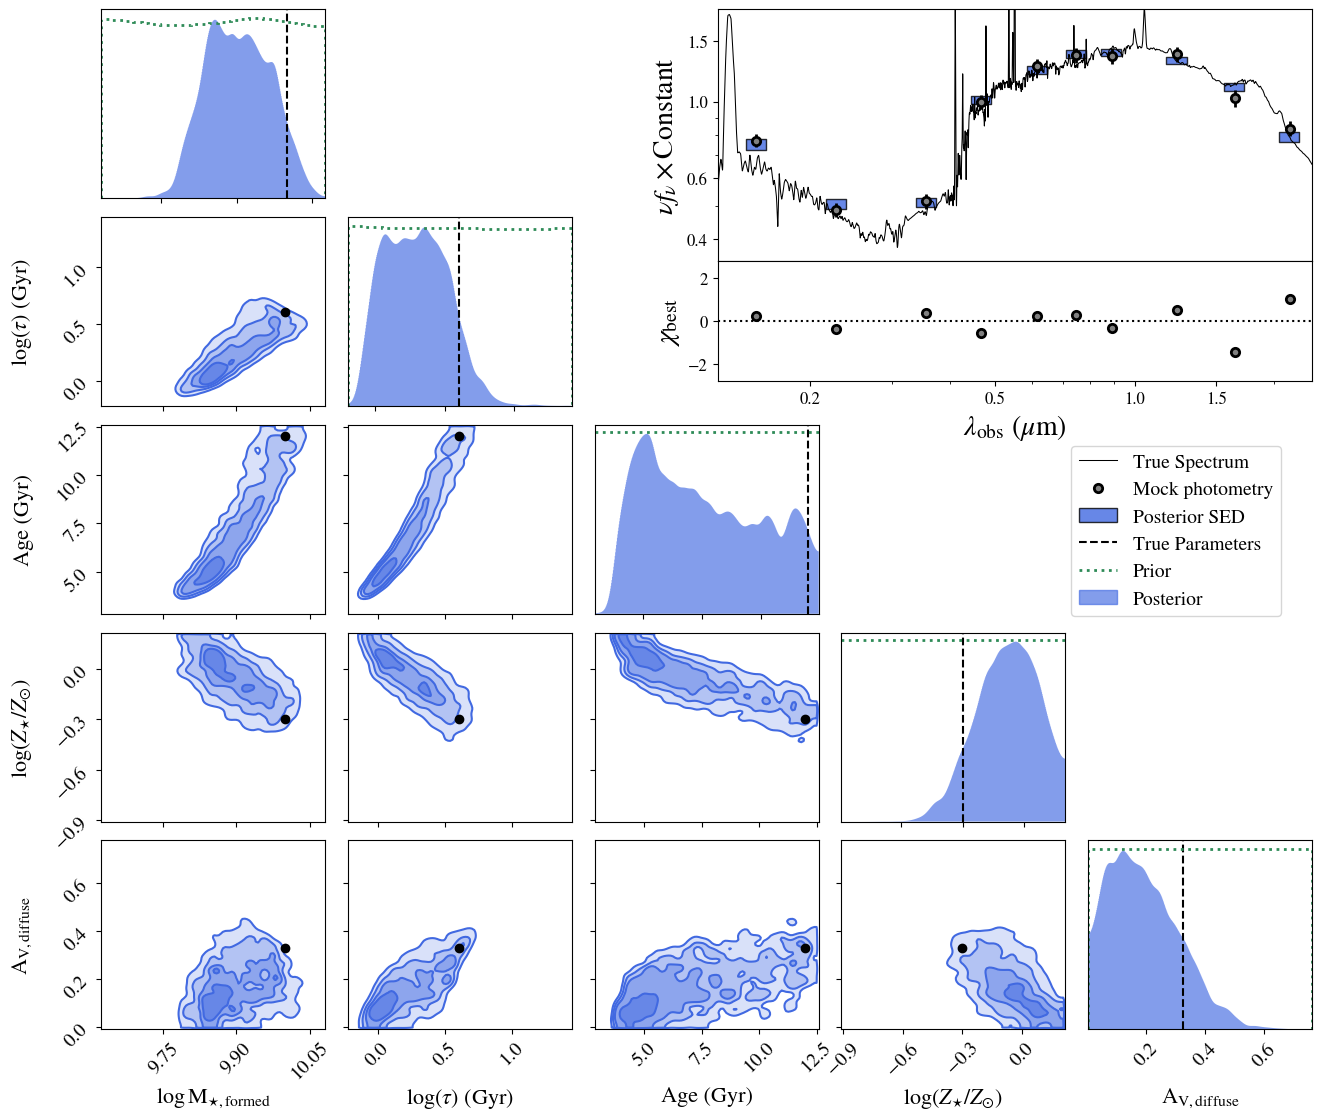

In [21]:
plotter = Plotter(nufnu=True, **vars(args))
plotter.plot_all()

# Save

In [23]:
# --- Saving ----
    # ---------------
if args.fignum:
    plotter.fig.savefig("paperfigures/{}.{}".format(args.fignum, args.figext), dpi=400)
else:
    pl.ion()
    pl.show()